In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
with open('data/dynamic_log_icra2024_3trees_deletion_smalltrees.json') as f:
    data = json.load(f)
    
df = pd.json_normalize(data)
df.columns = df.columns.str.replace('.*(?=\.).','',regex=True)
df['planner'] = df['planner'].replace({
    'dynamic_planner_fre': 'Full reorder',
    'dynamic_planner_lci': 'Our method',
    'dynamic_planner_initial_orbit': 'Initial orbit'
})
df['Length/Visited'] = df['total_path_length'] / df['n_visited']
df['p_given'] = df['n_given'] / df['n_total']
df['p_given'] = 100.0 * (df['p_given']*4.0).round() / 4.0
df['p_discoverable'] = df['n_discoverable'] / df['n_total']
df['p_discoverable'] = 100.0 * (df['p_discoverable']*4.0).round() / 4.0
df['p_false'] = df['n_false'] / df['n_total']
df['p_false'] = 100.0 * (df['p_false'] * 4.0).round() / 4.0
df['% visited'] = 100.0 * df['n_visited'] / df['n_total']

norm_value = df[(df['planner'] == 'Our method') & (df['p_given'] == 100)][['tree_model','Length/Visited']].groupby('tree_model').mean()
df = df.merge(norm_value, left_on='tree_model', right_index=True, how='left', suffixes=('', ' (normalized)'))
df['Length/Visited (Normalized)'] = df['Length/Visited'] / df['Length/Visited (normalized)']

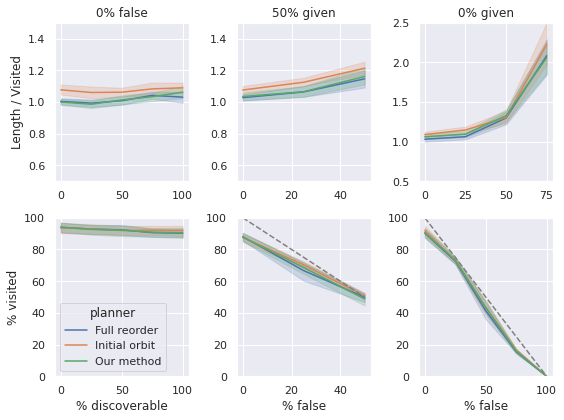

In [14]:
fig, axes = plt.subplots(2,3, figsize=(8,6))

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][0], legend=False)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][1], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='Length/Visited (Normalized)', hue='planner', ax=axes[0][2], legend=False)

sns.lineplot(data=df[df['n_false'] == 0].sort_values('planner'), x='p_discoverable', y='% visited', hue='planner', ax=axes[1][0], legend=True)
sns.lineplot(data=df[df['p_given'] == 50].sort_values('planner'), x='p_false', y='% visited', hue='planner', ax=axes[1][1], legend=False)
sns.lineplot(data=df[df['p_given'] == 0.0].sort_values('planner'), x='p_false', y='% visited', hue='planner', ax=axes[1][2], legend=False)

axes[0][0].set_ylim(0.5,1.5)
axes[0][1].set_ylim(0.5,1.5)
axes[0][2].set_ylim(0.5,2.5)

axes[1][0].plot([0,100],[100,100], color='grey', linestyle='--')
axes[1][1].plot([0,50],[100,50], color='grey', linestyle='--')
axes[1][2].plot([0,100],[100,0.0], color='grey', linestyle='--')

axes[1][0].set_ylim(0.0,100.0)
axes[1][1].set_ylim(0.0,100.0)
axes[1][2].set_ylim(0.0,100.0)
    
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')
        
axes[0,0].set_ylabel('Length / Visited')
axes[1,0].set_ylabel('% visited')

axes[1,0].set_xlabel('% discoverable')
axes[1,1].set_xlabel('% false')
axes[1,2].set_xlabel('% false')

axes[0,0].set_title('0% false')
axes[0,1].set_title('50% given')
axes[0,2].set_title('0% given')

plt.tight_layout()
plt.savefig('plots_combined.pdf')